In [15]:
# khai báo thư viện
import pandas as pd
from scipy import  stats
# đọc bộ dữ liệu
df = pd.read_excel("E:\PTDL\house_price_dống-da.xlsx")
df.describe()


C:\Users\DELL\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,area,price,toilet,bedroom,floor,lat,long
count,994.000000,9.440000e+02,551.000000,635.000000,376.000000,1000.000000,1000.000000
mean,137.972082,2.202988e+04,3.646098,3.959055,4.755319,21.015726,105.824669
std,742.629174,1.195280e+05,2.170039,2.298311,1.664924,0.006579,0.009462
min,0.000000,4.500000e+00,1.000000,1.000000,1.000000,20.998499,105.795544
25%,40.000000,3.650000e+03,2.000000,3.000000,4.000000,21.011113,105.819943
50%,60.000000,7.000000e+03,4.000000,4.000000,5.000000,21.018030,105.827298
75%,120.000000,1.550000e+04,4.000000,5.000000,5.000000,21.020169,105.829949
max,20000.000000,3.300000e+06,17.000000,22.000000,11.000000,21.036845,105.841429


In [2]:
# Giữa giá nhà và diện tích có tương quan với nhau?
# lọc dữ liệu
df1 = df.filter(['area', 'price'])
# xóa bỏ dữ liệu null
df1 = df1.dropna()
r, pvalue = stats.pearsonr(df1.area, df1.price)
print ("r: ", r, "; pvalue: ", pvalue)

r:  0.1633866007480246 ; pvalue:  4.6087480328408646e-07


In [5]:
'''
Nhận xét: do pvalue <5%, nên với mức ý nghĩa 5% bác bỏ giả thuyết không, chấp nhận giả thuyết đối

Kết luận: Giữa diện tích và giá có tương quan tuyến tính yếu với nhau
'''

'\nNhận xét: do pvalue <5%, nên với mức ý nghĩa 5% bác bỏ giả thuyết không, chấp nhận giả thuyết đối\n\nKết luận: Giữa diện tích và giá có tương quan tuyến tính yếu với nhau\n'

In [3]:
# Giữa giá nhà và tọa độ địa lý (lat, long) có tương quan với nhau
# lọc dữ liệu
df2 = df.filter(['lat', 'long', 'price'])
# xóa bỏ dữ liệu null
df2 = df2.dropna()
r, pvalue = stats.pearsonr(df2.price, df2.lat)
print ("r: ", r, "; pvalue: ", pvalue)
r1, pvalue1 =  stats.pearsonr(df2.price, df2.long)
print ("r1: ", r1, "; pvalue1: ", pvalue1)

r:  -0.04613783883040548 ; pvalue:  0.15664614294925963
r1:  0.06291389292828173 ; pvalue1:  0.05331551952714812


In [4]:
'''
Nhận xét: do pvalue >5%, nên với mức ý nghĩa 5% nên không có đủ cơ sở bác bỏ giả thuyết không

Kết luận: Giữa tọa độ và giá không có tương quan tuyến tính

'''

'\nNhận xét: do pvalue >5%, nên với mức ý nghĩa 5% nên không có đủ cơ sở bác bỏ giả thuyết không\n\nKết luận: Giữa tọa độ và giá không có tương quan tuyến tính\n\n'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

In [6]:
del(df3)

NameError: name 'df3' is not defined

In [16]:
# Giữa thuộc tính land_certificate và property_type có tương quan với nhau
# lọc dữ liệu
df3 = df.filter(['land_certificate', 'type_of_land'])
# xóa bỏ dữ liệu null
df3 = df3.dropna()
r, pvalue = stats.pearsonr(df3.land_certificate, df3.type_of_land)
print ("r: ", r, "; pvalue: ", pvalue)

r:  nan ; pvalue:  nan


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [45]:
contigency= pd.crosstab(df3['land_certificate'], df3['type_of_land'])
contigency

type_of_land,Bán nhà mặt phố,Bán nhà mặt phố\n,Bán nhà riêng,Bán nhà riêng\n,Bất động sản khác,Bất động sản khác\n,Chung cư,"Tập thể, cư xá",Đất thổ cư
land_certificate,,,,,,,,,
Sổ đỏ,19,114,222,186,7,9,59,69,8


<AxesSubplot:xlabel='type_of_land', ylabel='land_certificate'>

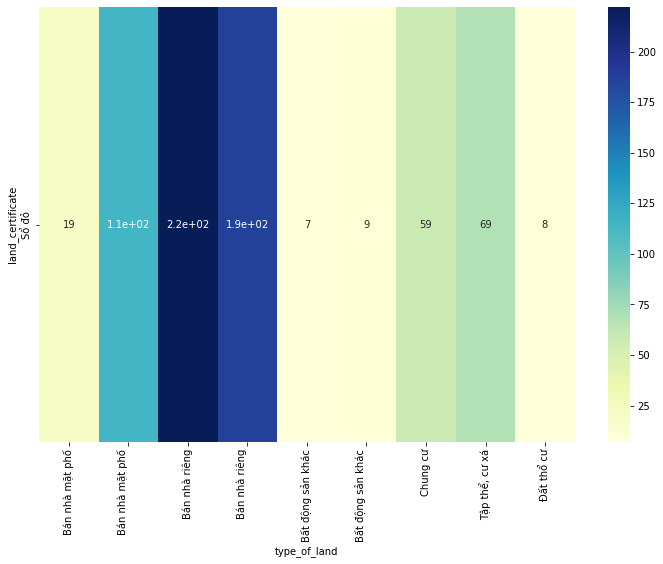

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12,8))

sns.heatmap(contigency, annot=True, cmap='YlGnBu')

In [51]:
# thực hiện kiểm định chi bình phương
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)

print (p)

1.0


In [44]:
df3

,land_certificate,type_of_land
0,Sổ đỏ,Bán nhà riêng\n
1,Sổ đỏ,Bán nhà mặt phố\n
2,Sổ đỏ,Bán nhà riêng\n
3,Sổ đỏ,Bán nhà riêng\n
4,Sổ đỏ,Bán nhà mặt phố\n
...,...,...
990,Sổ đỏ,Bán nhà riêng
991,Sổ đỏ,Bán nhà riêng
995,Sổ đỏ,Bán nhà mặt phố\n
998,Sổ đỏ,Bán nhà riêng


In [9]:
df.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [36]:
df4 = df.filter(['area', 'price', 'lat', 'long'])

In [37]:
df4.head()

,area,price,lat,long
0,50.0,14700.0,21.015698,105.824583
1,35.0,12500.0,21.008930,105.824105
2,57.0,4200.0,21.025208,105.833111
3,62.0,11000.0,21.025379,105.801011
4,70.0,36000.0,21.009239,105.824230


In [38]:
df4['gia_m2'] = df4['price']/df4['area']
df4.head()

,area,price,lat,long,gia_m2
0,50.0,14700.0,21.015698,105.824583,294.000000
1,35.0,12500.0,21.008930,105.824105,357.142857
2,57.0,4200.0,21.025208,105.833111,73.684211
3,62.0,11000.0,21.025379,105.801011,177.419355
4,70.0,36000.0,21.009239,105.824230,514.285714


In [39]:
q1, q2, q3  = df4['gia_m2'].quantile(0.25), df4['gia_m2'].quantile(0.5), df4['gia_m2'].quantile(0.75)

In [40]:
def gia_m2_order(gia_m2):

    if gia_m2 < q1:

        return 1

    elif gia_m2>=q1 and gia_m2 <q2:

        return 2

    elif gia_m2>=q2 and gia_m2 <q3:

        return 3

    else: 

        return 4

df4['gia_m2_ordinal']=df4.gia_m2.apply(gia_m2_order)

In [41]:
df4.head()

,area,price,lat,long,gia_m2,gia_m2_ordinal
0,50.0,14700.0,21.015698,105.824583,294.000000,4
1,35.0,12500.0,21.008930,105.824105,357.142857,4
2,57.0,4200.0,21.025208,105.833111,73.684211,2
3,62.0,11000.0,21.025379,105.801011,177.419355,3
4,70.0,36000.0,21.009239,105.824230,514.285714,4


# 
Tiến hành kiểm định. Do gia_m2_ordinal là dữ liệu kiểu thứ bậc nên sử dụng kiểm định spearman để kiểm định tương quan giữa gia_m2_ordinal và lat,long

Giả thuyết không: Giữa gia_m2_ordinal và lat,long không có tương quan
Giả thuyết đối: Giữa gia_m2_ordinal và lat,long có tương quan

In [52]:
r, pvalue = stats.spearmanr(df4.lat, df4.gia_m2_ordinal)

print ('r: ', r, '; pvalue: ', pvalue)

r1, pvalue1 = stats.spearmanr(df4.long, df4.gia_m2_ordinal)

print ('r1: ', r1, '; pvalue1: ', pvalue1)

r:  0.05464179086707694 ; pvalue:  0.08415790197083328
r1:  -0.012573019322261677 ; pvalue1:  0.6912847245613033


# 

Nhận xét: pvalue > 0, chưa đủ cơ sở để kết luận giữa hai thuộc tính này có mối liên hệ với nhau